Каталог скачан с http://exoplanet.eu/catalog/ 2023-08-11

На любом этапе прикидывать реалистичность данных.  
На любом этапе очищать данные от обнаруженных неточностей, несоответствий.  

Готовые "библиотеки" для анализа
!pip install pandas_profiling --upgrade
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

-----
- Предварительный просмотр данных
  - df.sample(5)
- Переименование полей
  - df.columns = df.columns.str.lower().str.replace(' ',  '\_')
- Общее количество записей и типы столбцов
  - df.shape, 
  - df.info()
- Проверить любые нулевые значения
  - df.isnull().sum(), 
  - df.isnull().sum() / df.shape[0]
- Удалить ненужные колонки
- Проверить дубликаты записей
  - df[df.duplicated()].shape[0], 
  - df[df.duplicated()].shape[0] / df.shape[0], 
  - df.drop_duplicates(subset=None, keep=’first’, inplace=False)
- Преобразование типов данных
  - df.describe(include='object'),
  - время df.pickup = pd.to_datetime(df.pickup),
  - категориальные типы данных (при небольшом количестве значений?)  
    for col in ('color', 'payment', 'pickup_borough', 'dropoff_borough'):
    df[col] = df[col].astype('category')
- ВременнЫе границы, пропущенные периоды
  - мин, макс,
  - разница (макс - мин) + 1 - количеством имеющихся периодов,
  - барплот "периоды - количество строк"

-----
##### Одномерный анализ
- Посмотреть временные ряды числовых данных (средние?) (по дням, месяцам и годам?). Тенденции, периодичность.
- Гистограмма распределения числовых данных. Посмотреть выбросы
- Гистограмма распределения числовых данных, в разрезе по различным категориям (пол, тип оплаты...). 
  Если категория две, то скрипки, если больше, то полупрозрачные гистограммы (или kde)?
- Распределение количества данных по категориальным данным sns.histplot(data=df, x='city_category'); или plt.pie(df.gender.value_counts(), labels=['M', 'F'])

-----
##### Двумерный анализ  
- Функции распределения цели по пользователям/товарам... purchase_by_user = df.groupby('user_id')['purchase'].sum(); sns.ecdfplot(purchase_by_user.values);  
- Гистограммы распределения числовых данных - парное совместное распределение.  
- Диаграммы Параметры категориальные - цель (цель может быть "разной"? Сумма продаж на категорию, средняя сумма продаж на покупателя из категории, средний чек, среднее количество покупок на покупателя в категории...).  
- Двумерные диаграммы. Скаттерплоты + линии регрессии, барплоты "категориальные - числовые". На скаттерплоте категории цветом вывести. Удобнее такое смотреть в BI-системе?  
- Сводные таблицы "Категория - Категория - Числовые данные (цель?)". FasetGrid?
- Pairplot для числовых данных sns.pairplot(df)  
- Корреляционные матрицы df.corr().style.background_gradient(cmap='crest'). С версии 1.5.0 можно не только для числовых столбиков  

-----
- Удалить выбросы? заполнить недостающие значения? Или это уже для ML?  
```python
q_1, q_3 = np.nanpercentile(df.A, [25, 75])
up_thresh = q_3 + 1.5 * diff_3_1
low_thresh = q_1 - 1.5 * diff_3_1
df.A[(df.A > low_thresh) * (df.A < up_thresh)]
```  

-----
- Присоединить новые данные (погода, курсы валют, индексы деловой активности)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

--------------------

## Предобработка

In [22]:
df = pd.read_csv('exoplanet_eu_catalog.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (96) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,eccentricity,eccentricity_error_min,eccentricity_error_max,inclination,inclination_error_min,inclination_error_max,angular_distance,discovered,updated,omega,omega_error_min,omega_error_max,tperi,tperi_error_min,tperi_error_max,tconj,tconj_error_min,tconj_error_max,tzero_tr,tzero_tr_error_min,tzero_tr_error_max,tzero_tr_sec,tzero_tr_sec_error_min,tzero_tr_sec_error_max,lambda_angle,lambda_angle_error_min,lambda_angle_error_max,impact_parameter,impact_parameter_error_min,impact_parameter_error_max,tzero_vr,tzero_vr_error_min,tzero_vr_error_max,k,k_error_min,k_error_max,temp_calculated,temp_calculated_error_min,temp_calculated_error_max,temp_measured,hot_point_lon,geometric_albedo,geometric_albedo_error_min,geometric_albedo_error_max,log_g,publication,detection_type,mass_detection_type,radius_detection_type,alternate_names,molecules,star_name,ra,dec,mag_v,mag_i,mag_j,mag_h,mag_k,star_distance,star_distance_error_min,star_distance_error_max,star_metallicity,star_metallicity_error_min,star_metallicity_error_max,star_mass,star_mass_error_min,star_mass_error_max,star_radius,star_radius_error_min,star_radius_error_max,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,16.1284,1.53491,1.53491,NaN,NaN,NaN,326.03,0.32,0.32,1.29,0.05,0.05,0.231,0.005,0.005,NaN,NaN,NaN,0.011664,2007.0,2023-03-03,94.80,1.50,1.50,2452899.60,1.60,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.8,2.60,2.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,Radial Velocity,NaN,NaN,NaN,11 Com,185.179167,17.792778,4.74,NaN,NaN,NaN,NaN,110.6,10.5,10.5,-0.350,0.09,0.09,2.7000,0.300,0.300,19.00,2.00,2.00,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.00,3.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,730000.00,365000.00,365000.00,243.00,55.00,55.00,NaN,NaN,NaN,NaN,NaN,NaN,1.675862,2007.0,2018-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Imaging,NaN,NaN,Oph 1622-2405 b,NaN,11 Oph,245.604167,-24.087222,NaN,NaN,NaN,NaN,14.03,145.0,20.0,20.0,NaN,NaN,NaN,0.0162,0.005,0.005,NaN,NaN,NaN,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,NaN,NaN,NaN,11.0873,1.10000,1.10000,NaN,NaN,NaN,516.22,3.25,3.25,1.54,0.07,0.07,0.080,0.030,0.030,NaN,NaN,NaN,0.012887,2009.0,2023-03-03,117.63,21.06,21.06,2452861.05,2.06,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.7,7.15,7.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,Radial Velocity,NaN,NaN,NaN,11 UMi,229.275000,71.823889,5.02,NaN,NaN,NaN,NaN,119.5,6.9,6.9,0.040,0.04,0.04,1.8000,0.250,0.250,24.08,1.84,1.84,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,11 Uma b,Candidate,3.72,0.82,0.82,NaN,NaN,NaN,NaN,NaN,NaN,651.90,7.10,7.10,1.56,0.07,0.07,0.700,0.070,0.070,NaN,NaN,NaN,0.049367,2008.0,2021-10-02,6.24,8.90,8.90,53469.30,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Default,NaN,NaN,NaN,NaN,11 Uma,137.095833,66.873333,5.16,NaN,NaN,NaN,NaN,31.6,2.9,2.9,-0.245,0.04,0.04,1.8100,0.195,0.195,36.30,4.20,4.20,K5III,NaN,NaN,NaN,4090.0,70.0,70.0,NaN,NaN,NaN
4,14 And b,Confirmed,NaN,NaN,NaN,4.6840,0.23000,0.23000,NaN,NaN,NaN,185.84,0.23,0.23,0.83,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.010864,2008.0,2023-03-03,NaN,NaN,NaN,2452861.40,1.50,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   # name                      8328 non-null   object 
 1   planet_status               8328 non-null   object 
 2   mass                        2243 non-null   float64
 3   mass_error_min              2030 non-null   float64
 4   mass_error_max              2025 non-null   float64
 5   mass_sini                   1324 non-null   float64
 6   mass_sini_error_min         1144 non-null   float64
 7   mass_sini_error_max         1143 non-null   float64
 8   radius                      6334 non-null   float64
 9   radius_error_min            6125 non-null   float64
 10  radius_error_max            6125 non-null   float64
 11  orbital_period              7745 non-null   float64
 12  orbital_period_error_min    7309 non-null   float64
 13  orbital_period_error_max    7309 

Переименование полей не требуется.
Позже сделать:
- updated - превратить в дату
- сделать ктегориальными: planet_status	publication	detection_type	mass_detection_type	radius_detection_type	star_detected_disc	star_magnetic_field	

Доля непустых значений

In [26]:
pd.set_option('display.max_rows', 100)
notnamean = df.notna().mean()
notnamean

# name                        1.000000
planet_status                 1.000000
mass                          0.269332
mass_error_min                0.243756
mass_error_max                0.243156
mass_sini                     0.158982
mass_sini_error_min           0.137368
mass_sini_error_max           0.137248
radius                        0.760567
radius_error_min              0.735471
radius_error_max              0.735471
orbital_period                0.929995
orbital_period_error_min      0.877642
orbital_period_error_max      0.877642
semi_major_axis               0.742915
semi_major_axis_error_min     0.330692
semi_major_axis_error_max     0.330692
eccentricity                  0.300432
eccentricity_error_min        0.236551
eccentricity_error_max        0.235711
inclination                   0.475144
inclination_error_min         0.185159
inclination_error_max         0.185159
angular_distance              0.089097
discovered                    0.996638
updated                  

In [27]:
df.describe()

,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,eccentricity,eccentricity_error_min,eccentricity_error_max,inclination,inclination_error_min,inclination_error_max,angular_distance,discovered,omega,omega_error_min,omega_error_max,tperi,tperi_error_min,tperi_error_max,tconj,tconj_error_min,tconj_error_max,tzero_tr,tzero_tr_error_min,tzero_tr_error_max,tzero_tr_sec,tzero_tr_sec_error_min,tzero_tr_sec_error_max,lambda_angle,lambda_angle_error_min,lambda_angle_error_max,impact_parameter,impact_parameter_error_min,impact_parameter_error_max,tzero_vr,tzero_vr_error_min,tzero_vr_error_max,k,k_error_min,k_error_max,temp_calculated,temp_calculated_error_min,temp_calculated_error_max,temp_measured,hot_point_lon,geometric_albedo,geometric_albedo_error_min,geometric_albedo_error_max,log_g,ra,dec,mag_v,mag_i,mag_j,mag_h,mag_k,star_distance,star_distance_error_min,star_distance_error_max,star_metallicity,star_metallicity_error_min,star_metallicity_error_max,star_mass,star_mass_error_min,star_mass_error_max,star_radius,star_radius_error_min,star_radius_error_max,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max
count,2243.000000,2030.0000,2025.00,1324.000000,1144.0000,1143.00000,6334.000000,6125.000000,6125.000000,7.745000e+03,7309.000000,7309.000000,6187.000000,2754.000000,2754.00000,2502.000000,1970.00000,1963.000000,3957.000000,1542.000000,1542.0000,742.000000,8300.000000,1590.00000,1486.000000,1486.000000,9.330000e+02,8.650000e+02,8.650000e+02,2.665000e+03,2597.000000,2597.000000,3.730000e+03,3.566000e+03,3.566000e+03,4.700000e+01,45.000000,45.000000,97.000000,98.000000,98.000000,4155.000000,4130.000000,4130.000000,5.400000e+01,47.000000,47.000000,1531.000000,1482.000000,1482.000000,3507.000000,915.000000,915.000000,81.000000,4.00000,17.000000,15.000000,15.000000,53.000000,8328.000000,8328.000000,2786.000000,2469.000000,5277.000000,5259.000000,4562.000000,5507.000000,3777.0000,3778.0000,6779.000000,5823.000000,5823.000000,7506.000000,6576.000000,6576.000,7018.000000,6732.000000,6732.000000,3085.000000,2743.000,2747.00,7256.000000,6918.000000,6918.000000
mean,13.769640,inf,inf,5.510418,inf,inf,5.492516,1.323736,2.324276,2.004019e+03,401.127083,inf,18.024417,1.313201,inf,0.176319,inf,0.104342,85.801693,2.381479,inf,1.213402,2015.892530,167.03146,132.071545,133.101108,2.144796e+06,1.626759e+02,1.775700e+02,2.452837e+06,2.192034,2.284684,2.450636e+06,1.587450e+06,1.587450e+06,2.358142e+06,0.234219,0.191548,133.315619,12.575561,12.779714,1.019227,0.438224,0.414229,1.691773e+06,3.003306,3.007987,235.790659,476.262501,478.023420,932.942521,38.889727,32.374645,1756.482716,253.75000,0.275471,0.072333,0.083000,4.290585,245.745310,23.293478,10.765563,13.984140,12.790983,12.411796,12.499351,821.028614,inf,inf,-0.064956,0.952010,0.936574,0.961447,0.109811,inf,1.574733,0.200974,0.312057,4.203533,inf,inf,5572.645123,130.023816,126.413939
std,45.470243,NaN,NaN,25.893241,NaN,NaN,87.551930,28.365063,41.571101,9.457563e+04,14019.975381,NaN,261.189139,13.644233,NaN,0.208217,NaN,0.791521,13.852646,9.375899,NaN,22.387762,3.964509,108.70134,3172.825638,3172.802462,8.064488e+05,1.559933e+03,1.684095e+03,7.706037e+04,88.835872,91.004694,3.966593e+05,1.173590e+06,1.173590e+06,4.770254e+05,0.534835,0.414351,131.423711,14.459976,15.222725,6.164236,2.727273,2.587682,3.388968e+06,9.153638,9.152982,5583.653406,17202.186296,17202.327823,630.113624,118.816273,36.952232,1686.658487,364.17521,0.256398,0.074038,0.080485,0.574748,85.467967,34.360698,3.467792,1.547709,1.494293,1.476594,1.414644,9107.412165,NaN,NaN,0.247805,58.968924,58.969110,0.457096,0.369330,NaN,4.260978,0.756099,1.459156,2.605125,NaN,NaN,2819.967975,169.372612,166.344048
min,0.000002,0.0000,0.00,0.000190,0.0000,0.00000,0.000000,0.000000,0.000000,1.9600

In [28]:
df.describe(include='object')

,# name,planet_status,updated,publication,detection_type,mass_detection_type,radius_detection_type,alternate_names,molecules,star_name,star_sp_type,star_detected_disc,star_magnetic_field,star_alternate_names
count,8328,8328,8328,8328,8328,2233,1388,3509,113,8213,2398,122,6,5815
unique,8328,4,1096,4,9,7,3,3509,70,6574,419,2,2,4655
top,11 Com b,Confirmed,2021-02-05,Announced on a website,Primary Transit,Radial Velocity,Primary Transit,Oph 1622-2405 b,H2O,HD 10180,G5,IR Excess,Yes,"KOI-351, 2MASS J18574403+4918185, KIC 11442793..."
freq,1,5487,2700,4325,6197,1411,1267,1,13,9,71,70,5,8


Ищем дубликаты:

In [4]:
df[df.duplicated()].shape[0]

0

updated превратим из строки в дату

In [23]:
df.updated = pd.to_datetime(df.updated)

In [24]:
df.updated.dtypes

dtype('<M8[ns]')

Еще ряд полей сделаем категориальными:

In [25]:
for col in ('planet_status publication detection_type mass_detection_type radius_detection_type star_detected_disc star_magnetic_field'.split()): 
    df[col] = df[col].astype('category')

In [26]:
df.select_dtypes('category').head()

,planet_status,publication,detection_type,mass_detection_type,radius_detection_type,star_detected_disc,star_magnetic_field
0,Confirmed,Published in a refereed paper,Radial Velocity,Radial Velocity,NaN,NaN,NaN
1,Confirmed,Published in a refereed paper,Imaging,NaN,NaN,NaN,NaN
2,Confirmed,Published in a refereed paper,Radial Velocity,Radial Velocity,NaN,NaN,NaN
3,Candidate,Published in a refereed paper,Default,NaN,NaN,NaN,NaN
4,Confirmed,Published in a refereed paper,Radial Velocity,Radial Velocity,NaN,NaN,NaN


In [27]:
df.describe(include='object')

,# name,alternate_names,molecules,star_name,star_sp_type,star_alternate_names
count,8328,3509,113,8213,2398,5815
unique,8328,3509,70,6574,419,4655
top,11 Com b,Oph 1622-2405 b,H2O,HD 10180,G5,"KOI-351, 2MASS J18574403+4918185, KIC 11442793..."
freq,1,1,13,9,71,8


In [28]:
df.describe(include='category')

,planet_status,publication,detection_type,mass_detection_type,radius_detection_type,star_detected_disc,star_magnetic_field
count,8328,8328,8328,2233,1388,122,6
unique,4,4,9,7,3,2,2
top,Confirmed,Announced on a website,Primary Transit,Radial Velocity,Primary Transit,IR Excess,Yes
freq,5487,4325,6197,1411,1267,70,5


Сохраним в "соленьях", чтобы не преобразовывать каждый раз:

In [30]:
df.to_pickle('exoplanet_eu_catalog_preprocessed.pkl')

--------------

## Одномерный анализ

In [2]:
df = pd.read_pickle('exoplanet_eu_catalog_preprocessed.pkl')
df.head()

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,eccentricity,eccentricity_error_min,eccentricity_error_max,inclination,inclination_error_min,inclination_error_max,angular_distance,discovered,updated,omega,omega_error_min,omega_error_max,tperi,tperi_error_min,tperi_error_max,tconj,tconj_error_min,tconj_error_max,tzero_tr,tzero_tr_error_min,tzero_tr_error_max,tzero_tr_sec,tzero_tr_sec_error_min,tzero_tr_sec_error_max,lambda_angle,lambda_angle_error_min,lambda_angle_error_max,impact_parameter,impact_parameter_error_min,impact_parameter_error_max,tzero_vr,tzero_vr_error_min,tzero_vr_error_max,k,k_error_min,k_error_max,temp_calculated,temp_calculated_error_min,temp_calculated_error_max,temp_measured,hot_point_lon,geometric_albedo,geometric_albedo_error_min,geometric_albedo_error_max,log_g,publication,detection_type,mass_detection_type,radius_detection_type,alternate_names,molecules,star_name,ra,dec,mag_v,mag_i,mag_j,mag_h,mag_k,star_distance,star_distance_error_min,star_distance_error_max,star_metallicity,star_metallicity_error_min,star_metallicity_error_max,star_mass,star_mass_error_min,star_mass_error_max,star_radius,star_radius_error_min,star_radius_error_max,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,16.1284,1.53491,1.53491,NaN,NaN,NaN,326.03,0.32,0.32,1.29,0.05,0.05,0.231,0.005,0.005,NaN,NaN,NaN,0.011664,2007.0,2023-03-03,94.80,1.50,1.50,2452899.60,1.60,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.8,2.60,2.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,Radial Velocity,NaN,NaN,NaN,11 Com,185.179167,17.792778,4.74,NaN,NaN,NaN,NaN,110.6,10.5,10.5,-0.350,0.09,0.09,2.7000,0.300,0.300,19.00,2.00,2.00,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.00,3.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,730000.00,365000.00,365000.00,243.00,55.00,55.00,NaN,NaN,NaN,NaN,NaN,NaN,1.675862,2007.0,2018-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Imaging,NaN,NaN,Oph 1622-2405 b,NaN,11 Oph,245.604167,-24.087222,NaN,NaN,NaN,NaN,14.03,145.0,20.0,20.0,NaN,NaN,NaN,0.0162,0.005,0.005,NaN,NaN,NaN,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,NaN,NaN,NaN,11.0873,1.10000,1.10000,NaN,NaN,NaN,516.22,3.25,3.25,1.54,0.07,0.07,0.080,0.030,0.030,NaN,NaN,NaN,0.012887,2009.0,2023-03-03,117.63,21.06,21.06,2452861.05,2.06,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.7,7.15,7.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,Radial Velocity,NaN,NaN,NaN,11 UMi,229.275000,71.823889,5.02,NaN,NaN,NaN,NaN,119.5,6.9,6.9,0.040,0.04,0.04,1.8000,0.250,0.250,24.08,1.84,1.84,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,11 Uma b,Candidate,3.72,0.82,0.82,NaN,NaN,NaN,NaN,NaN,NaN,651.90,7.10,7.10,1.56,0.07,0.07,0.700,0.070,0.070,NaN,NaN,NaN,0.049367,2008.0,2021-10-02,6.24,8.90,8.90,53469.30,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Default,NaN,NaN,NaN,NaN,11 Uma,137.095833,66.873333,5.16,NaN,NaN,NaN,NaN,31.6,2.9,2.9,-0.245,0.04,0.04,1.8100,0.195,0.195,36.30,4.20,4.20,K5III,NaN,NaN,NaN,4090.0,70.0,70.0,NaN,NaN,NaN
4,14 And b,Confirmed,NaN,NaN,NaN,4.6840,0.23000,0.23000,NaN,NaN,NaN,185.84,0.23,0.23,0.83,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.010864,2008.0,2023-03-03,NaN,NaN,NaN,2452861.40,1.50,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [19]:
df.discovered.dropna().value_counts()

2017.0    2529
2016.0    1562
2014.0     893
2022.0     462
2018.0     388
2019.0     282
2020.0     269
2021.0     255
2011.0     226
2013.0     210
2015.0     182
2012.0     169
2010.0     163
2023.0     156
2009.0     110
2007.0      90
2008.0      80
2006.0      53
2005.0      38
2002.0      37
2004.0      37
2003.0      31
2000.0      24
1999.0      16
2001.0      16
1996.0       7
1998.0       7
1995.0       3
1992.0       3
1989.0       1
1997.0       1
Name: discovered, dtype: int64

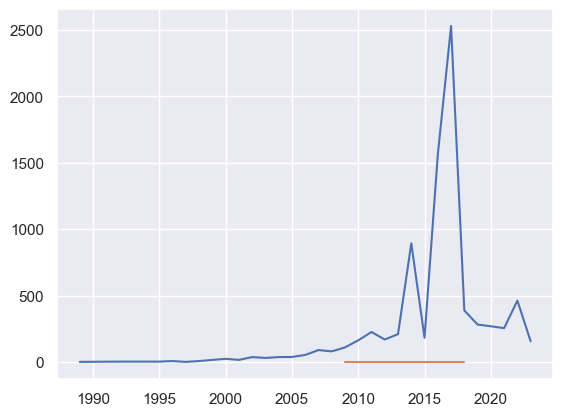

In [25]:
df.discovered.dropna().value_counts().sort_index().plot()
kepler_years = pd.Series(data=[0] * 10, index=[*range(2009, 2019)])
kepler_years.plot();

*(красным отмечены годы работы телескопа "Кеплер")

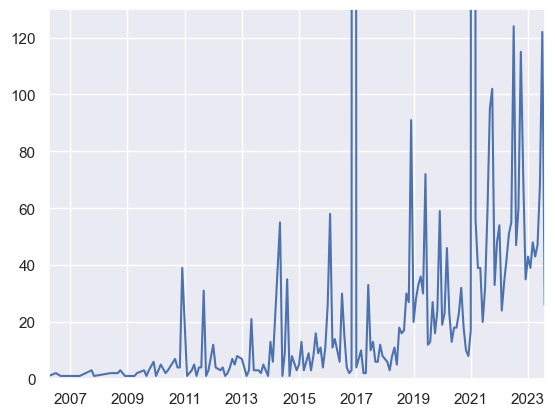

In [46]:
df.updated.dt.to_period("M").value_counts().sort_index().plot()
plt.ylim(0, 130);

In [4]:
df.head(1)

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,eccentricity,eccentricity_error_min,eccentricity_error_max,inclination,inclination_error_min,inclination_error_max,angular_distance,discovered,updated,omega,omega_error_min,omega_error_max,tperi,tperi_error_min,tperi_error_max,tconj,tconj_error_min,tconj_error_max,tzero_tr,tzero_tr_error_min,tzero_tr_error_max,tzero_tr_sec,tzero_tr_sec_error_min,tzero_tr_sec_error_max,lambda_angle,lambda_angle_error_min,lambda_angle_error_max,impact_parameter,impact_parameter_error_min,impact_parameter_error_max,tzero_vr,tzero_vr_error_min,tzero_vr_error_max,k,k_error_min,k_error_max,temp_calculated,temp_calculated_error_min,temp_calculated_error_max,temp_measured,hot_point_lon,geometric_albedo,geometric_albedo_error_min,geometric_albedo_error_max,log_g,publication,detection_type,mass_detection_type,radius_detection_type,alternate_names,molecules,star_name,ra,dec,mag_v,mag_i,mag_j,mag_h,mag_k,star_distance,star_distance_error_min,star_distance_error_max,star_metallicity,star_metallicity_error_min,star_metallicity_error_max,star_mass,star_mass_error_min,star_mass_error_max,star_radius,star_radius_error_min,star_radius_error_max,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,16.1284,1.53491,1.53491,NaN,NaN,NaN,326.03,0.32,0.32,1.29,0.05,0.05,0.231,0.005,0.005,NaN,NaN,NaN,0.011664,2007.0,2023-03-03,94.8,1.5,1.5,2452899.6,1.6,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.8,2.6,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,Radial Velocity,NaN,NaN,NaN,11 Com,185.179167,17.792778,4.74,NaN,NaN,NaN,NaN,110.6,10.5,10.5,-0.35,0.09,0.09,2.7,0.3,0.3,19.0,2.0,2.0,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN


In [6]:
df.columns

Index(['# name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'im